In [71]:
import pandas as pd
import numpy as np
import os
import ftrosa
import matplotlib.pyplot as plt
import librosa

# Vocals waveforms

In [47]:
path = 'data/separated/htdemucs/'
song_list=[]
vocal_wav_list=[]
for song in os.listdir(path):
    song_list.append(song)
    y,sr = librosa.load(path+song+'/vocals.wav', mono=True)
    print(song,' load complete')
    vocal_wav_list.append(y)

01_Taxman  load complete
02_Eleanor_Rigby  load complete
03_Im_Only_Sleeping  load complete
04_Love_You_To  load complete
05_Here_There_And_Everywhere  load complete
06_Yellow_Submarine  load complete
07_She_Said_She_Said  load complete
08_Good_Day_Sunshine  load complete
09_And_Your_Bird_Can_Sing  load complete
10_For_No_One  load complete
11_Doctor_Robert  load complete
12_I_Want_To_Tell_You  load complete
13_Got_To_Get_You_Into_My_Life  load complete
14_Tomorrow_Never_Knows  load complete


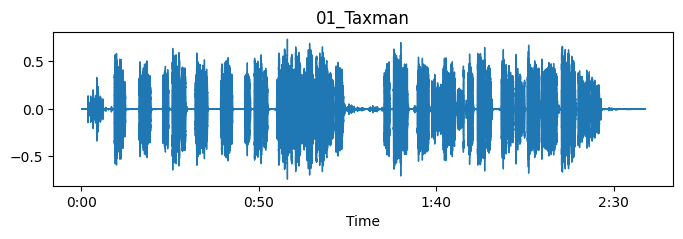

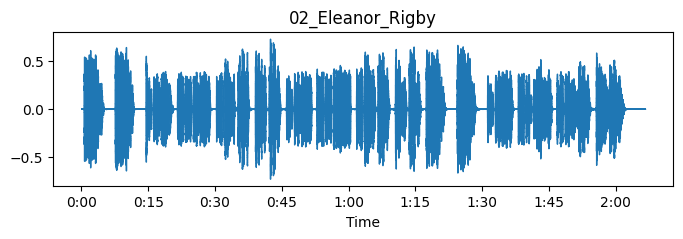

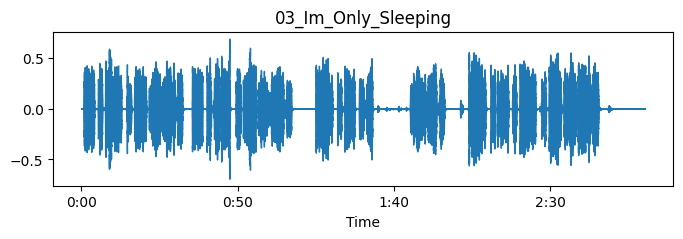

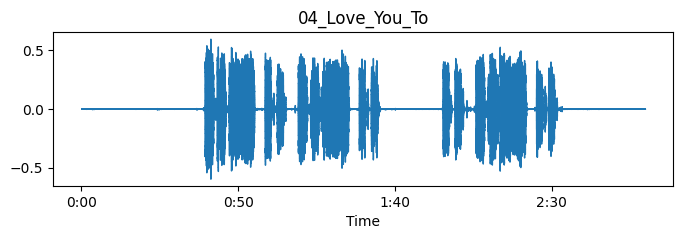

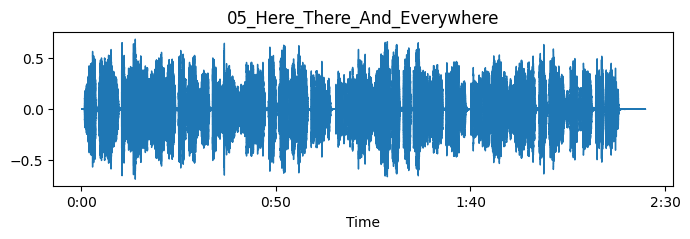

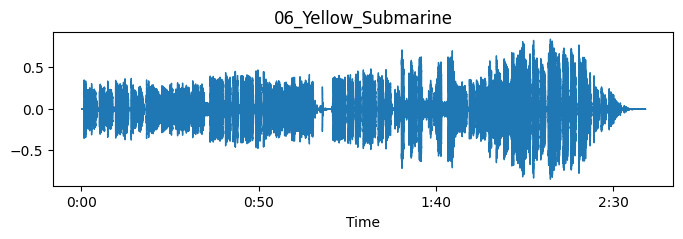

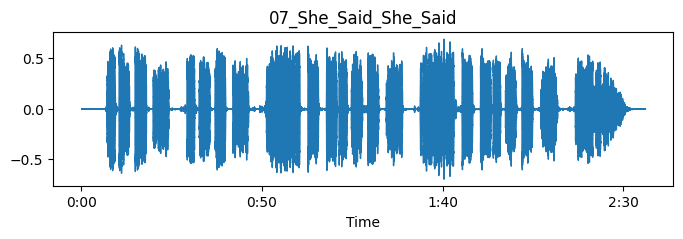

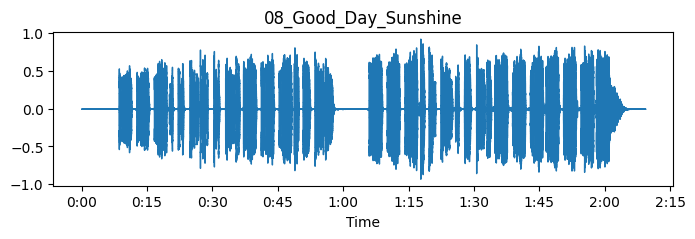

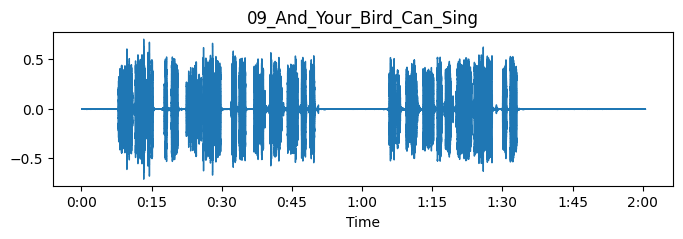

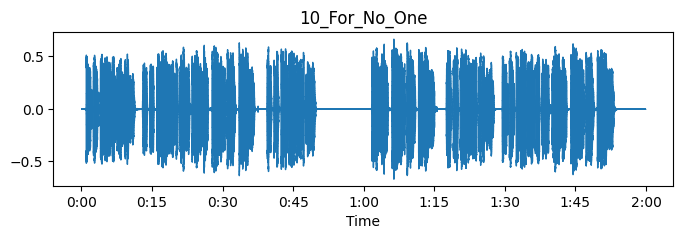

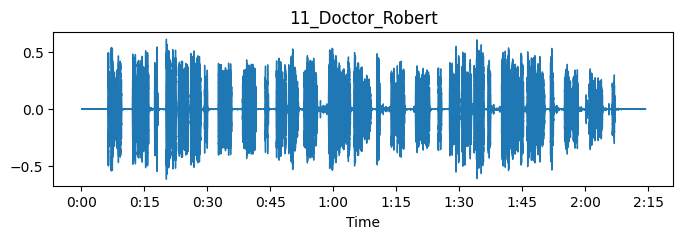

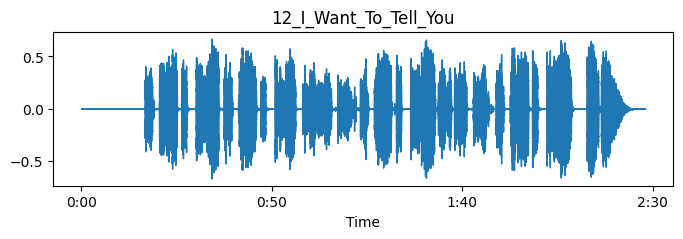

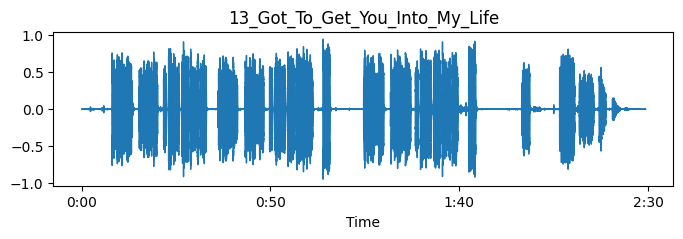

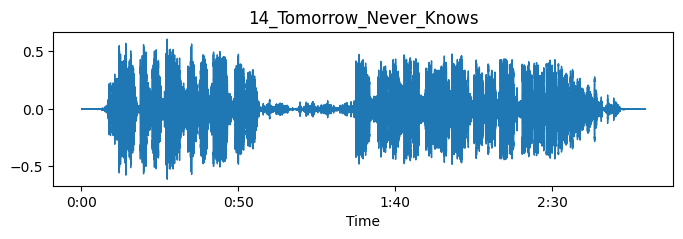

In [108]:
# mono audio waveforms

sr=22050
for i in range(len(song_list)):
    y = vocal_wav_list[i]
    plt.figure(figsize=(8,2))
    plt.title(song_list[i])
    librosa.display.waveshow(y)
    plt.show()

USE ONLY NON-SILENCE PARTS

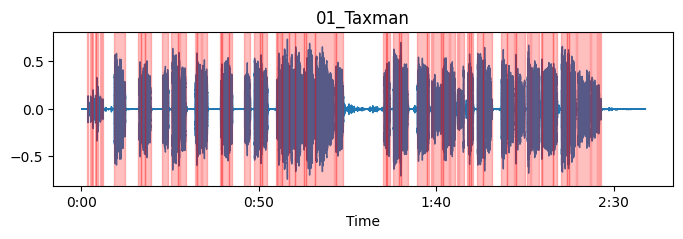

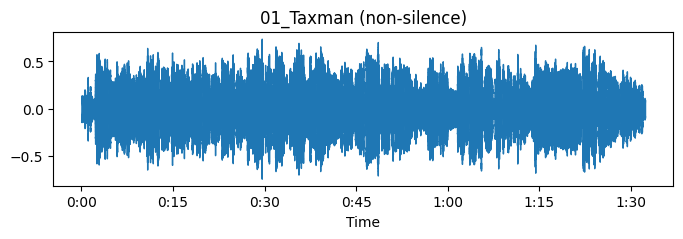

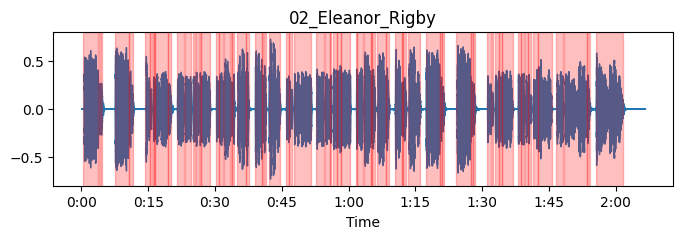

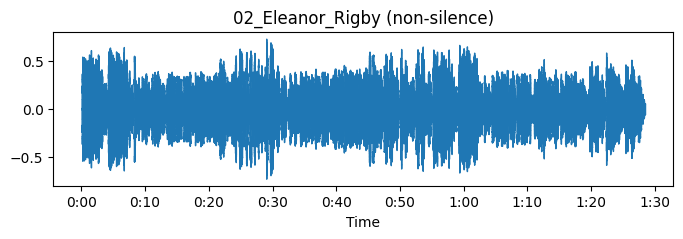

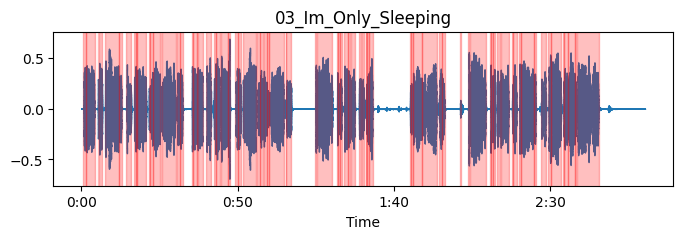

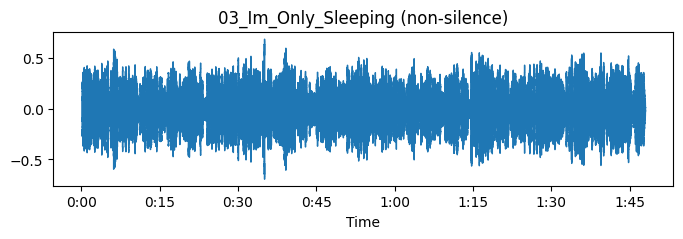

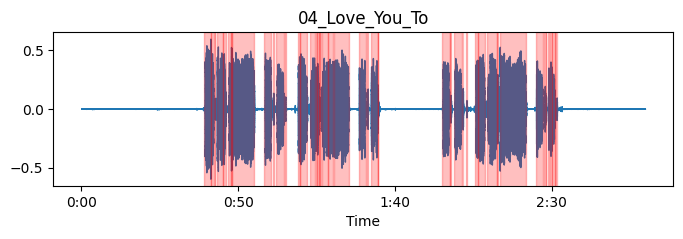

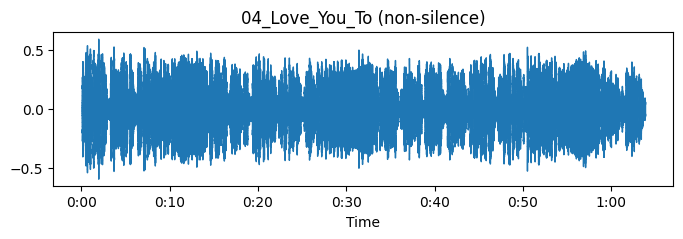

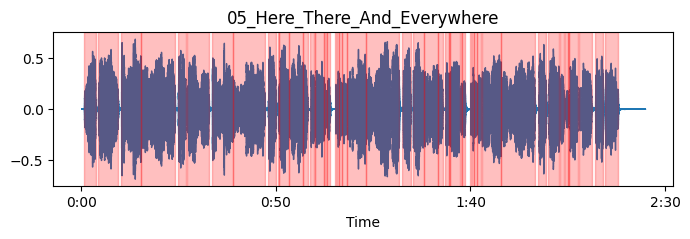

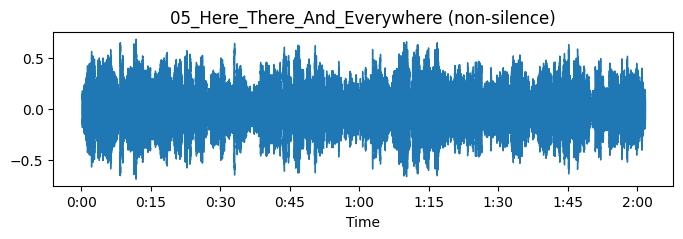

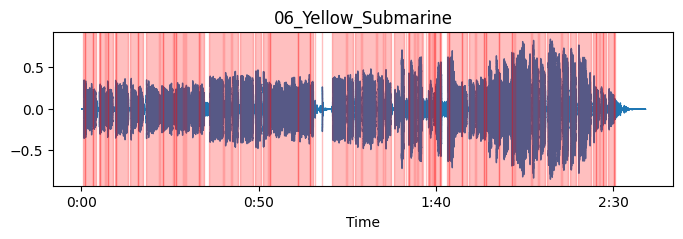

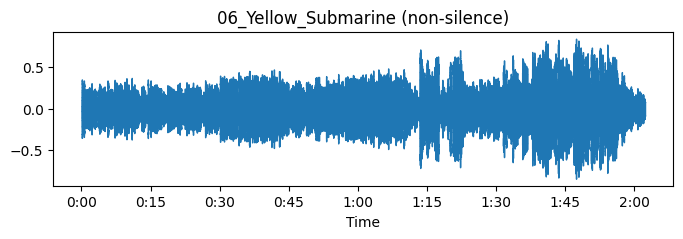

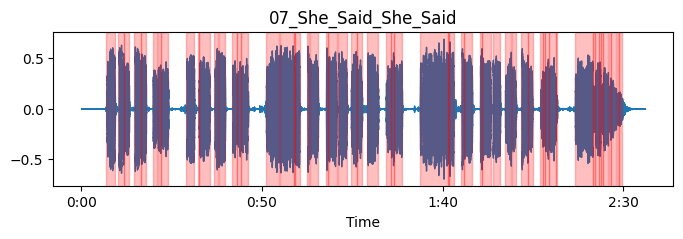

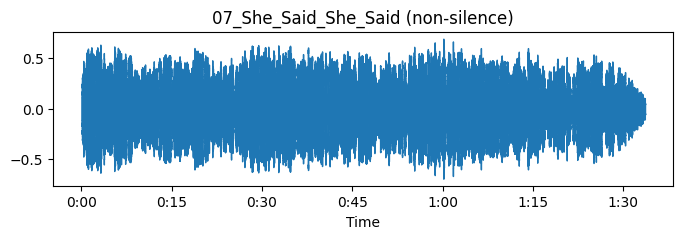

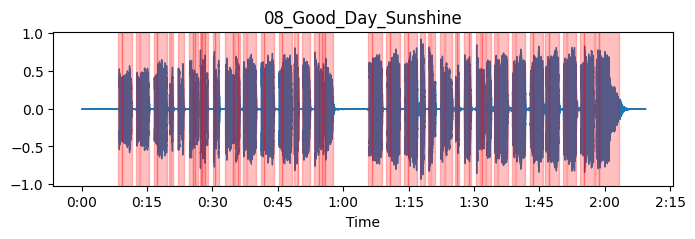

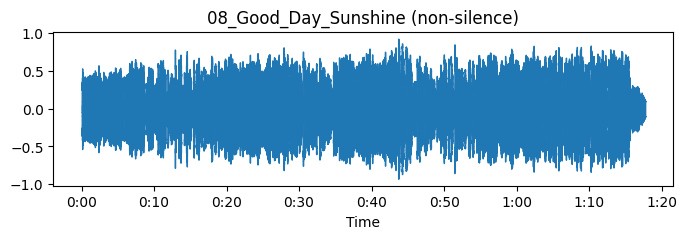

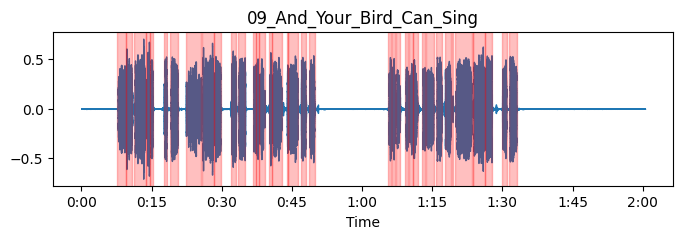

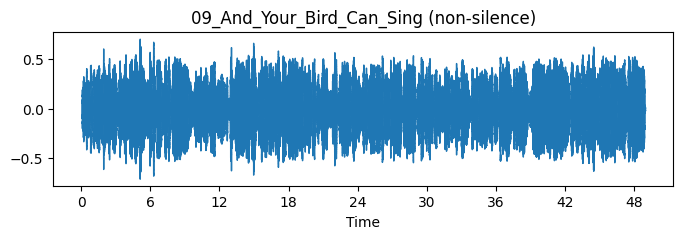

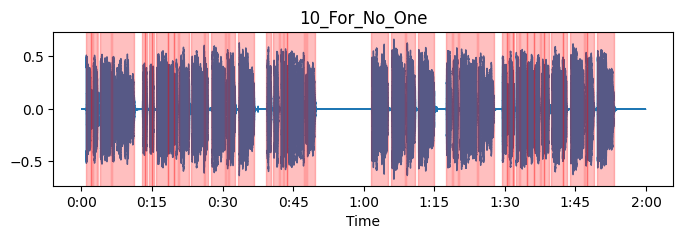

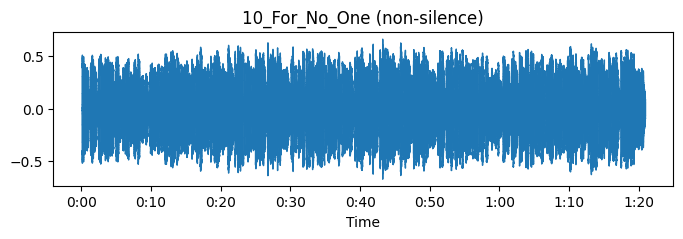

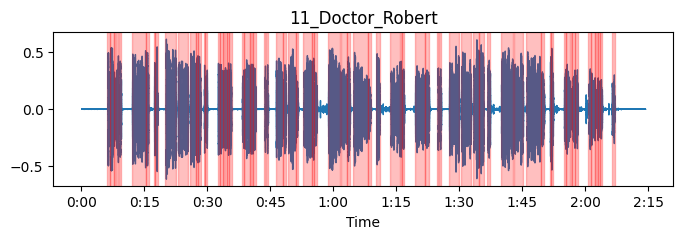

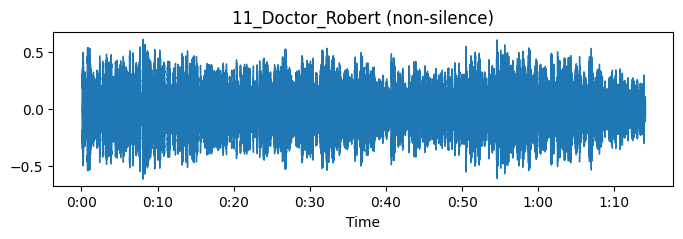

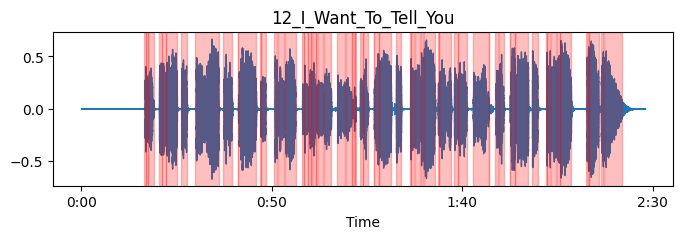

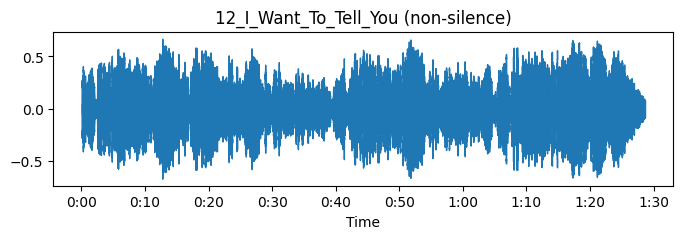

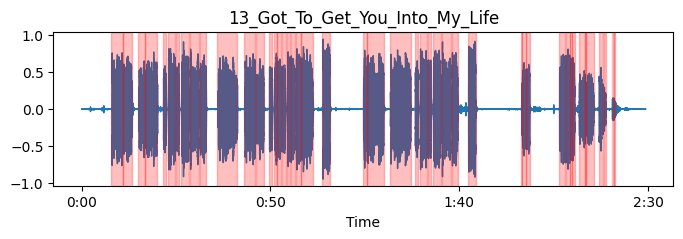

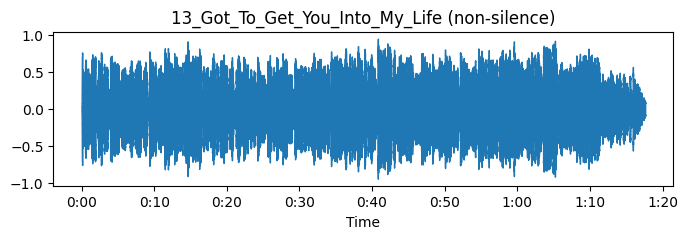

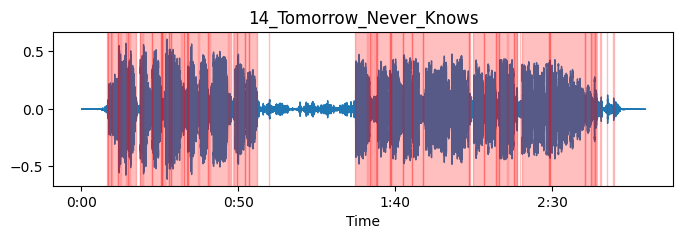

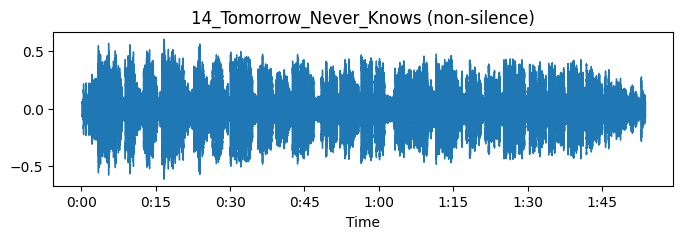

In [110]:
sr=22050
vocal_ns_wav_list = []
for i in range(len(song_list)):
    y = vocal_wav_list[i]
    intervals = librosa.effects.split(y, top_db=20)
    ns_y = [] # non-silence y
    for ival in intervals:
        yi = y[ival[0]:ival[1]]
        ns_y+=yi.tolist()
    vocal_ns_wav_list.append(np.array(ns_y))
    interval_times = librosa.samples_to_time(intervals, sr=sr)
    plt.figure(figsize=(8,2))
    plt.title(song_list[i])
    librosa.display.waveshow(y)
    for ival in interval_times:
        plt.axvspan(ival[0], ival[1], ymin=-1, ymax=1, alpha=0.25, color='r')
    plt.figure(figsize=(8,2))
    plt.title(song_list[i]+ ' (non-silence)')
    librosa.display.waveshow(np.array(ns_y))
    plt.show()

In [96]:
import IPython.display as ipd

In [107]:
print('Non-stop(non-silence) only-vocal audio be like: ')
print("'Got To Get You Into My Life'")
ipd.Audio(vocal_ns_wav_list[12][:20*sr], rate=sr)

Non-stop(non-silence) only-vocal audio be like: 
'Got To Get You Into My Life'


PITCH SHIFT

In [ ]:
librosa.effects.pitch_shift()

# Feature Extraction

MFCC

In [ ]:
# use only 30seconds of each songs